# Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic=pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## About the variables:
- `PassengerId` is the unique id of the row and it doesn't have any effect on target
- `Survived` is the target variable we are trying to predict (0 or 1):

1 = Survived

0 = Not Survived
- `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):

1 = Upper Class

2 = Middle Class

3 = Lower Class
- `Name`, Sex and Age are self-explanatory
- `SibSp` is the total number of the passengers' siblings and spouse
- `Parch` is the total number of the passengers' parents and children
- `Ticket` is the ticket number of the passenger
- `Fare` is the passenger fare
- `Cabin` is the cabin number of the passenger
- `Embarked` is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):

C = Cherbourg

Q = Queenstown

S = Southampton


## Little bit about features

In [4]:
print('The shape of our dataset is : ',titanic.shape)
print('\n')
print(titanic.info())
print('*'*50)
print(titanic.isnull().sum())

The shape of our dataset is :  (891, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
**************************************************
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch       

With above output

We can clearly say that there are 891 rows and 11 columns including Target.

`Age` and `Fare` columns having continuous data also the type of these are float data type.

`Name`, `Sex`, `Ticket`,`Cabin`and `Embarked` columns have object data type.

`PassengerID`,`PCclass`,`SibSp` and `Parch` columns have integer data type.

And the last one `Survived` is our target level. Here 0 for death and 1 for live i.e. we have to predict binary classification.

Also we can see that some columns have huge number of missing values.
- `Age` has 177 missing age rows.
- `Cabin` has 687 missing Cabin rows.
- `Embarked` has only 2 missing embarked rows.

###### to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data.

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Dictionary
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.


### Statistics of Dataset.

- PassengerID is a kind of identification of the passengers. This will not effect our Target variable so that's why  some where we will drop this.
#### `Age`
- Min:- 0.42
- Max:- 80
#### `Fare`
- Min:- 0
- Max:- 512

`Age`and `Fare` columns have big difference from minimum to maximum. This could not be acceptable.

## Let's Check the imbalancing of the data.

In [6]:
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

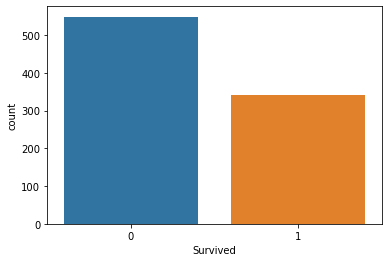

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(x='Survived',data=titanic,)

From above output, we can see that almost 62% of the people in this dataset have died during this disaster. This is slightly less than the survived pepople but we can not say that our dataset is imbalance dataset.

So we are good to go.

In [8]:
titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We can see that pclass has good replationship with Age and Fare. It could be helpful for feature engeneering.

Let's First look into the Categorical columns.
 
 # Categorical Features:

## pclass


In [9]:
titanic['Survived'].groupby(titanic['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

`Pclass` Class played a critical role in survival, as the survival rate decreased drastically for the lowest class. This variable is both useful and clean, and I will be treating it as a categorical variable.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

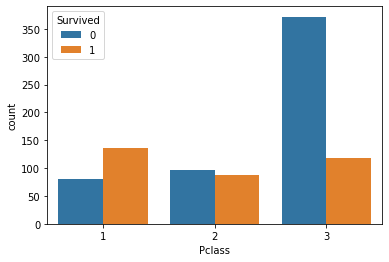

In [10]:
sns.countplot(x='Pclass',data=titanic,hue='Survived')

 We can see in the plotting that those passengers have class 3, the chances of survival of them is very low.
 
 ## Sex

Survived - 
 female    0.681287
male      0.318713
Name: Sex, dtype: float64


Death - 
 male      0.852459
female    0.147541
Name: Sex, dtype: float64


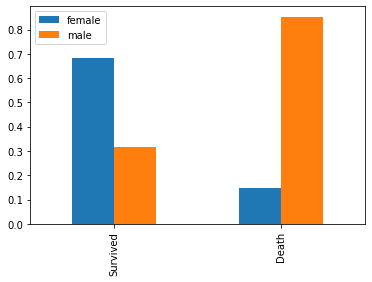

In [11]:
live=titanic[titanic['Survived']==1]['Sex'].value_counts(normalize=True)
dead=titanic[titanic['Survived']==0]['Sex'].value_counts(normalize=True)
pd.DataFrame([live,dead],index=['Survived','Death']).plot.bar()

print('Survived - \n', live)
print('\n')
print('Death - \n',dead)


import warnings as war
war.filterwarnings('ignore')

From the above graph,

It will help us to find the chance of survival of any passenger based on his sex. If a new person found, and  is a female passenger then there is a good chance that she will be alive. And also we can see that The number of Death male passenger is very high.

The Chart confirms Women more likely survivied than Men.

# SibSp

Survived - 
 0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: SibSp, dtype: float64


Death - 
 0    0.724954
1    0.176685
2    0.027322
4    0.027322
3    0.021858
8    0.012750
5    0.009107
Name: SibSp, dtype: float64


<Figure size 1080x648 with 0 Axes>

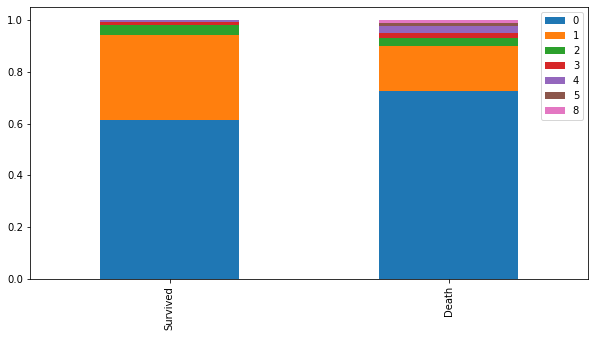

In [12]:
live=titanic[titanic['Survived']==1]['SibSp'].value_counts(normalize=True)
dead=titanic[titanic['Survived']==0]['SibSp'].value_counts(normalize=True)
plt.figure(figsize=(15,9))
pd.DataFrame([live,dead],index=['Survived','Death']).plot.bar(stacked=True, figsize=(10,5))

print('Survived - \n', live)
print('\n')
print('Death - \n',dead)

## Observation:
- The Chart confirms a person aboarded with more than 2 parents or children more likely survived.
- The Chart confirms a person aboarded alone more likely dead.

Survived - 
 S    0.638235
C    0.273529
Q    0.088235
Name: Embarked, dtype: float64


Death - 
 S    0.777778
C    0.136612
Q    0.085610
Name: Embarked, dtype: float64


<Figure size 1080x648 with 0 Axes>

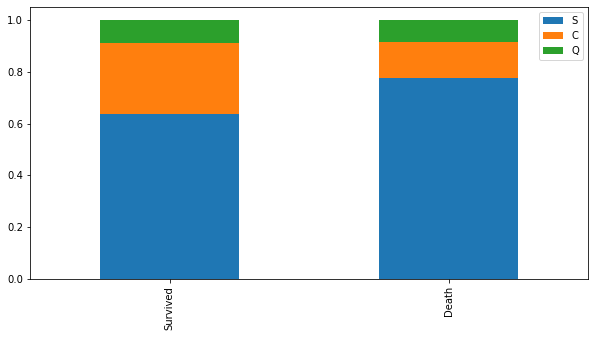

In [13]:
live=titanic[titanic['Survived']==1]['Embarked'].value_counts(normalize=True)
dead=titanic[titanic['Survived']==0]['Embarked'].value_counts(normalize=True)
plt.figure(figsize=(15,9))
pd.DataFrame([live,dead],index=['Survived','Death']).plot.bar(stacked=True, figsize=(10,5))

print('Survived - \n', live)
print('\n')
print('Death - \n',dead)

- The Chart confirms a person aboarded from C slightly more likely survived.
- The Chart confirms a person aboarded from Q more likely dead.
- The Chart confirms a person aboarded from S more likely dead.

## Pclass and Sex vs Survived

Text(0.5, 1.0, 'Pclass and Age VS Survived')

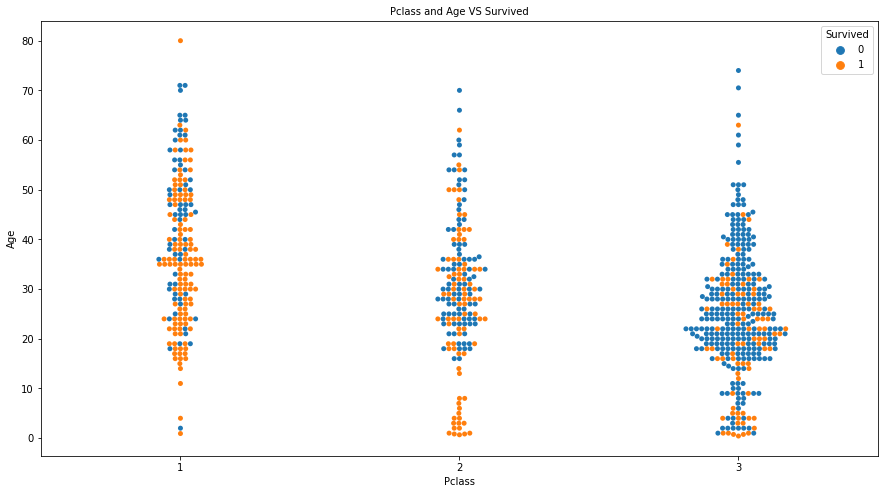

In [14]:
f,ax=plt.subplots(figsize=(15,8))
sns.swarmplot(x='Pclass',y='Age', hue='Survived',data=titanic,ax=ax)
ax.set_title('Pclass and Age VS Survived',fontsize=10)

## Observations:

- 1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

- 2)Survival chances for Passenegers aged 20-50 from Pclass1 is high. It means that if a person aged between 20 to 50 years and having passenger class 1 then there is a good chance of his survival.

Text(0.5, 1.0, 'Sex and Age VS Survived')

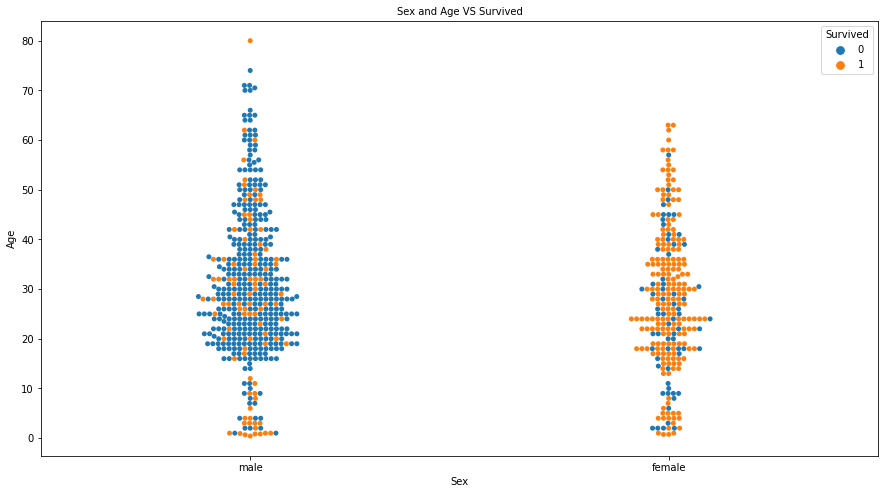

In [15]:
f,ax=plt.subplots(figsize=(15,8))
sns.swarmplot(x='Sex',y='Age', hue='Survived',data=titanic,ax=ax)
ax.set_title('Sex and Age VS Survived',fontsize=10)

## Observation:
- 1) We can see that women have high probabily of survival when they are between 15 to 40 years old.
- 2) For men the probability of survival when they are 0 to 10 years i.e. children is high as well as for female.
- 3) For men the probability of survival is very low when they are adult.

# Feature Engineering

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling i.e. Feature engineering is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.

It is a fact that our machine learning understand only numerical data. So that's why we have to convert our object data into  numerical  data type.

In this dataset Passengers name present as a feature and we already observe that female people have more  chances of survival than male passengers. So that's we will extract passengers gender and age from name feature.

Let's do that.



In [16]:
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
#  here we are  extracting name titles form name columns  like Mrs, Mr. Miss etc from name column
title=[]
for i in list(titanic['Name']):
    title.append(i.split(' ')[1].replace('.',''))
print('The length of title is : ',len(title))
print('\n')
## Appending title with our titanic dataset
titanic['Title']=title
titanic.head()

The length of title is :  891




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
titanic['Title'].value_counts()

Mr              502
Miss            179
Mrs             121
Master           40
Dr                7
Rev               6
y                 4
Planke,           3
Impe,             3
Col               2
Mlle              2
Gordon,           2
Major             2
Messemaeker,      1
Billiard,         1
Mme               1
Carlo,            1
Velde,            1
Mulder,           1
Melkebeke,        1
der               1
Pelsmaeker,       1
Don               1
Ms                1
the               1
Capt              1
Walle,            1
Cruyssen,         1
Steen,            1
Shawah,           1
Jonkheer          1
Name: Title, dtype: int64

We got the titles of the name column. Let's convert them into numerical datatype.

We are assigning Mr=0,Miss=1,Mrs=2 and others=3

In [19]:
titanic['Title']=titanic['Title'].replace({'Mr':0,'Mrs':2,'Miss':1,'Master':3,'Dr':3,'Rev':3,'y':3,'Planke,':3,'Impe,':3,
                                           'Major':3,'Gordon,':3,'Mlle':3,'Col':3,'Carlo,':3,'Walle,':3,'Ms':3,'Steen,':3,
                                           'Jonkheer':3,'Messemaeker,':3,'Capt':3,'Cruyssen,':3,'the':3,'Shawah,':3,'Mme':3,
                                           'Melkebeke,':3,'Velde,':3,'Pelsmaeker,':3,'der':3,'Mulder,':3,'Don':3,'Billiard,':3})
titanic['Title'].value_counts()

0    502
1    179
2    121
3     89
Name: Title, dtype: int64

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Survived - 
 1    0.368421
2    0.283626
0    0.230994
3    0.116959
Name: Title, dtype: float64


Death - 
 0    0.770492
1    0.096539
3    0.089253
2    0.043716
Name: Title, dtype: float64


<Figure size 1080x648 with 0 Axes>

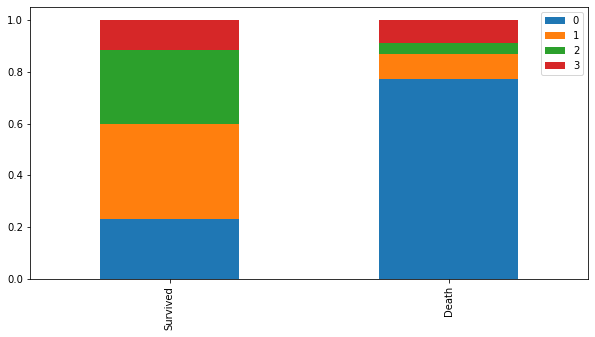

In [21]:
live=titanic[titanic['Survived']==1]['Title'].value_counts(normalize=True)
dead=titanic[titanic['Survived']==0]['Title'].value_counts(normalize=True)
plt.figure(figsize=(15,9))
pd.DataFrame([live,dead],index=['Survived','Death']).plot.bar(stacked=True, figsize=(10,5))

print('Survived - \n', live)
print('\n')
print('Death - \n',dead)

Now  we will delete the unwanted columns.

In [22]:
titanic=titanic.drop(columns=['Name','PassengerId'],axis=1)
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
713,0,3,male,29.0,0,0,7545,9.4833,NaN,S,0
549,1,2,male,8.0,1,1,C.A. 33112,36.7500,NaN,S,3
250,0,3,male,NaN,0,0,362316,7.2500,NaN,S,0
522,0,3,male,NaN,0,0,2624,7.2250,NaN,C,0
217,0,2,male,42.0,1,0,243847,27.0000,NaN,S,0


In [23]:
titanic['Sex']=titanic['Sex'].replace({'female':1,'male':0})
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

# Handling the Missing values

## Age
There are 177 Nulls present in Age feature, In 'Sex and Age vs Survival' relation graph we observed that the as age is increasing the chance of survival decreasing respectively. So we can say that  Age is important factor to predict our target.

So keeping above in mind, we are not going to fill na with simply mean or median of that particular column.
    We also observe form titanic.corr() that the `Age` column is tightly correlated with `Pclass` column. So I thought that we simply impute the  `Age` column with the help of KnnImputer.
    
Little bit about knnImputer:
- Knn imputer will try to find the relation with othr columns and impue the data accoding the relation with other columns.
- In this case Age Nan is depending on the similarity with Pclass column.

In [24]:
titanic['Age'].isnull().sum()

177

In [25]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(imputer.fit_transform(titanic[['Pclass','Age']]))
knn_imp

,0,1
0,3.0,22.000000
1,1.0,38.000000
2,3.0,26.000000
3,1.0,35.000000
4,3.0,35.000000
...,...,...
886,2.0,27.000000
887,1.0,19.000000
888,3.0,27.666667
889,1.0,26.000000


In [26]:
knn_imp.rename(columns={0:'Pclass',1:'Age'},inplace=True)

In [27]:
titanic=titanic.drop(columns=['Pclass','Age'],axis=1)

In [28]:
titanic=pd.concat([titanic,knn_imp],axis=1)


In [29]:
titanic.head()

,Survived,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Pclass,Age
0,0,0,1,0,A/5 21171,7.2500,NaN,S,0,3.0,22.0
1,1,1,1,0,PC 17599,71.2833,C85,C,2,1.0,38.0
2,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3.0,26.0
3,1,1,1,0,113803,53.1000,C123,S,2,1.0,35.0
4,0,0,0,0,373450,8.0500,NaN,S,0,3.0,35.0


In [30]:
titanic.isnull().sum()

Survived      0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
Pclass        0
Age           0
dtype: int64

# `Cabin` Column missing values handling:

In [31]:
titanic['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
C82            1
B79            1
T              1
C70            1
B19            1
Name: Cabin, Length: 147, dtype: int64

We can see that most of the cabin letters are associated with a high survival rate, so this might very well be a useful variable. Because there aren't that many unique values, we won't do any grouping here, even if some of the values have a small count.

Let's see the relationship Pclass with Cabin.

In above,there are 147 unique values in `Cabin` column. But we will take only first letter of them.

In [32]:
titanic['Cabin']=titanic['Cabin'].str[0]

In [33]:
titanic['Cabin']=titanic['Cabin'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})

<AxesSubplot:>

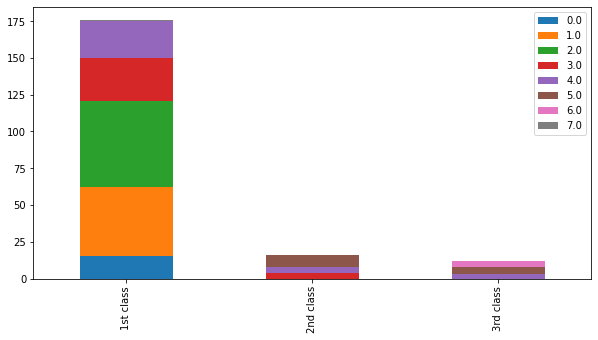

In [34]:
Pclass1 = titanic[titanic['Pclass']==1]['Cabin'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Cabin'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

    IN the above graph we can see that the passenger class 1 has most number of cabin presents.

So now what we will do we fill the Nan with respect to Passengers class.

In [35]:
# fill missing Cabin with median fare for each Pclass
titanic["Cabin"].fillna(titanic.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


In [36]:
titanic['Cabin'].isnull().sum()

0

In [37]:
titanic.head()

,Survived,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Pclass,Age
0,0,0,1,0,A/5 21171,7.2500,5.0,S,0,3.0,22.0
1,1,1,1,0,PC 17599,71.2833,2.0,C,2,1.0,38.0
2,1,1,0,0,STON/O2. 3101282,7.9250,5.0,S,1,3.0,26.0
3,1,1,1,0,113803,53.1000,2.0,S,2,1.0,35.0
4,0,0,0,0,373450,8.0500,5.0,S,0,3.0,35.0


In [38]:
titanic.isnull().sum()

Survived    0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
Title       0
Pclass      0
Age         0
dtype: int64

# Embarked vs Survival

Text(0.5, 1.0, 'Embarked VS Survived')

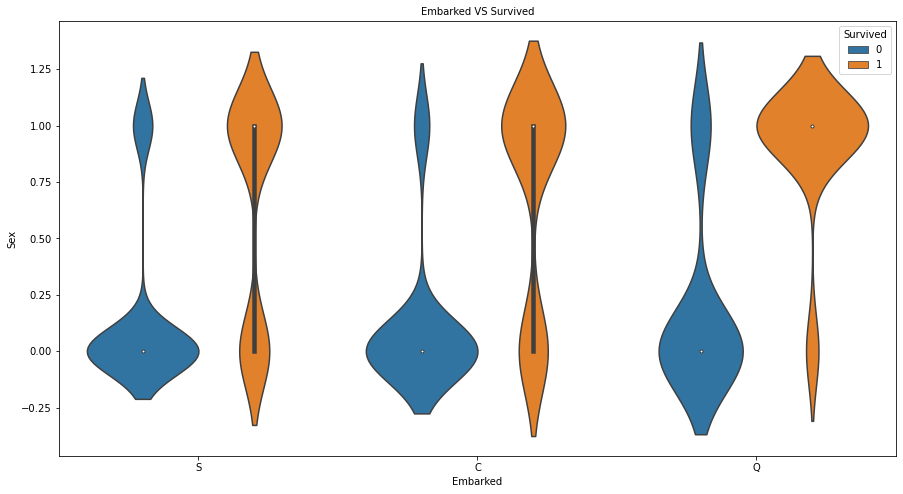

In [39]:
f,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='Embarked',y='Sex',hue='Survived',jitter=True,data=titanic,dodge=True,ax=ax,)
ax.set_title('Embarked VS Survived',fontsize=10)

Text(0.5, 1.0, 'Embarked VS Survived')

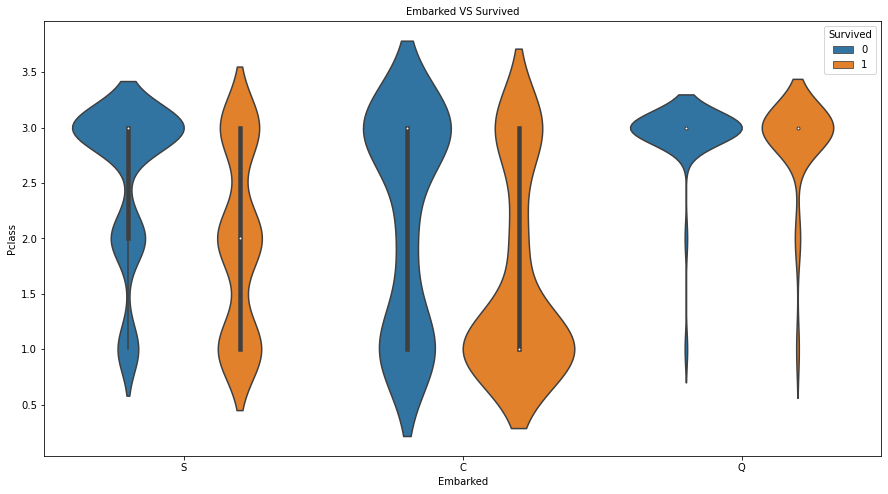

In [40]:
f,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='Embarked',y='Pclass',hue='Survived',jitter=True,data=titanic,dodge=True,ax=ax,)
ax.set_title('Embarked VS Survived',fontsize=10)

Observation:
- `Embarked` Seems to be correlated with `Survived`, depending  on the passenger's `Sex` and `class`.
- Women who have port on Q and having a passenger class 3 have a higher chance of survival. But other hand if women port on 'C' or 'S' then there probability of survival getting down.
- Men have a high survival probability if they are on Port 'C'. But in inverse if they are on other port there survival probability is low.


Embarked is a categorical feature and there are only 2 missing values in whole data set.

Let's see the what is those rows.

In [41]:
titanic[titanic['Embarked'].isnull()]

,Survived,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Pclass,Age
61,1,1,0,0,113572,80.0,1.0,NaN,1,1.0,38.0
829,1,1,0,0,113572,80.0,1.0,NaN,2,1.0,62.0


Those passengers Port point not given we can see that them above. There we can clearily see that both person gender is female, there class is same and ticket Number and Fare is also same. Their ages are 38 year and 62 year. So keep in mind those data, Seems they are mother and doughter and that definatly their Embarked point will be same as well.

In [42]:
print(titanic['Embarked'].value_counts())
print(titanic['Embarked'].value_counts(normalize=True))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

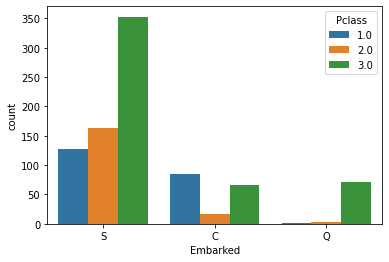

In [43]:
sns.countplot(x='Embarked',hue='Pclass',data=titanic)

## Observation:
In the above graph we can see that the majority of Embarked point 'S' is very high if  a passenger's class is 1. So that's why  we will fill the missing embarked point with 'S' because there passenger's class is also 1.

In [44]:
titanic['Embarked']=titanic['Embarked'].fillna('S')
titanic['Embarked'].isnull().sum()

0

In [45]:
titanic['Embarked']=titanic['Embarked'].replace({'S':0,'C':1 ,'Q':2})
titanic.head()

,Survived,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Pclass,Age
0,0,0,1,0,A/5 21171,7.2500,5.0,0,0,3.0,22.0
1,1,1,1,0,PC 17599,71.2833,2.0,1,2,1.0,38.0
2,1,1,0,0,STON/O2. 3101282,7.9250,5.0,0,1,3.0,26.0
3,1,1,1,0,113803,53.1000,2.0,0,2,1.0,35.0
4,0,0,0,0,373450,8.0500,5.0,0,0,3.0,35.0


In [46]:
## Dropping the unnecessary column.
titanic=titanic.drop('Ticket',axis=1)

# Plotting Heatmap:

<AxesSubplot:>

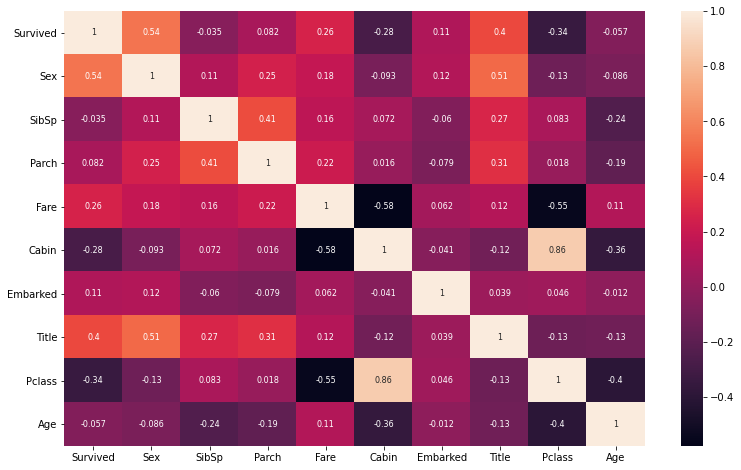

In [47]:
plt.figure(figsize=(13,8))
sns.heatmap(titanic.corr(),annot=True,annot_kws={'size':8})

## Observation of heatmap:

- 1) Seems Cabin and Pclass are 86% correlated with each other. In real time if any two features are 75 + correlate with eachother then we drop one of them.Interpreting But the first thing to note is that only the numeric features are compared, as it is obvious that we cannot correlate between alphabets or strings. And above we convert Cabin column from alphabate to numbers.
- 2) Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# Feature Engineering:

## Age and Fare
age and fare columns have continous data. let's visualize them.

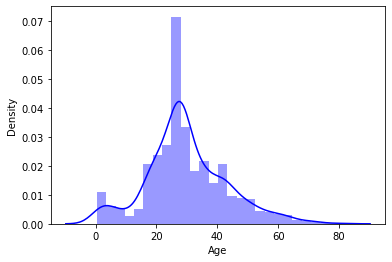

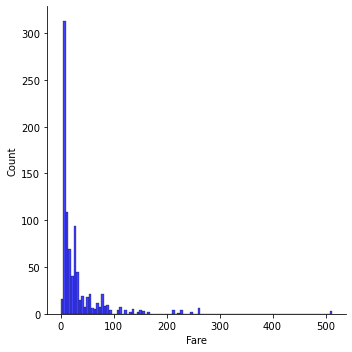

In [48]:
sns.distplot(titanic['Age'],color='b')
sns.displot(titanic['Fare'],color='b')

In [49]:
titanic[titanic['Fare']>300]

,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Pclass,Age
258,1,1,0,0,512.3292,2.0,1,1,1.0,35.0
679,1,0,0,1,512.3292,1.0,1,0,1.0,36.0
737,1,0,0,0,512.3292,1.0,1,0,1.0,35.0


In [50]:
titanic.skew()

Survived    0.478523
Sex         0.618921
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin      -1.523266
Embarked    1.543397
Title       1.027634
Pclass     -0.630548
Age         0.400702
dtype: float64

## Observation:
`Age` : The data distribution of Age column is enough fine. It is little bit right skewed but we will keep them.

`Fare` : The data distribution of Fare column is unpleasent, there are three rows present those Fare is more then 500 and we are not in a position to find that is it real data or wrong entry. In my point of view those are not outliers because it could be possible that they have enough money for that.

So keep above in mind will cut those those columns into bins i.e. we convert them into categorical data.

In [51]:
#Age
bins=[-1,0,5,12,18,24,35,60,100]
name = ['Unidentify', 'New_born', 'Child', 'young', 'above_20', 'Young_Adult', 'Adult<35', 'above_60']
titanic['Age_new']=pd.cut(titanic['Age'],bins,labels=name)

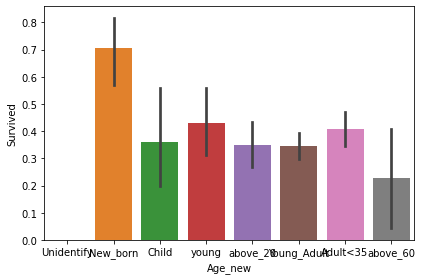

In [52]:
sns.barplot(x="Age_new", y="Survived", data=titanic)
plt.tight_layout()

In [53]:
titanic['Age_new']=titanic['Age_new'].replace({'Unidentify':0, 'New_born':1, 'Child':2,
                                               'young':3,
                                               'above_20':4,
                                               'Young_Adult':5,
                                               'Adult<35':6,
                                               'above_60':7})
titanic['Age_new'].value_counts()

5    367
6    225
4    138
3     70
1     44
2     25
7     22
Name: Age_new, dtype: int64

In [54]:
# Fare
titanic['Fare_new']=pd.qcut(titanic['Fare'],4,labels=[1,2,3,4])
titanic=titanic.drop('Fare',axis=1)
titanic['Fare_new'].value_counts()

2    224
1    223
3    222
4    222
Name: Fare_new, dtype: int64

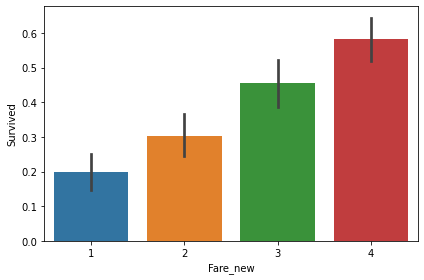

In [55]:
sns.barplot(x="Fare_new", y="Survived", data=titanic)
plt.tight_layout()

Here we successfully converted continous data into caterogical data.

In [56]:
titanic=titanic.drop('Age',axis=1)
titanic.head(2)

,Survived,Sex,SibSp,Parch,Cabin,Embarked,Title,Pclass,Age_new,Fare_new
0,0,0,1,0,5.0,0,0,3.0,4,1
1,1,1,1,0,2.0,1,2,1.0,6,4


## Family

Family is created by adding SibSp, Parch and 1. Here SibSp is count of sibling and spouse and similarly Parch is the count of parents and children. These all columns are adding and creating a new column name as Family.



1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64


<AxesSubplot:xlabel='Family', ylabel='count'>

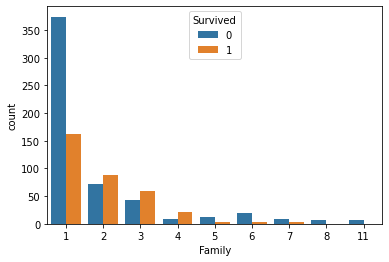

In [57]:
titanic['Family']=titanic['SibSp']+titanic['Parch']+1
titanic=titanic.drop(columns=['SibSp','Parch'],axis=1)
print(titanic['Family'].value_counts())
sns.countplot(x='Family',hue='Survived',data=titanic)

Here,
- Family with 1 are labeled as Alone
- Family with 2, 3 and 4 are labeled as Small
- Family with 5 and 6 are labeled as Medium
- Family with 7, 8 and 11 are labeled as Large

<AxesSubplot:xlabel='Family', ylabel='count'>

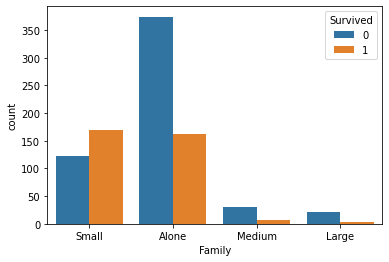

In [58]:
titanic['Family']=titanic['Family'].replace({1:'Alone',2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',
                                             8:'Large',11:'Large'})
sns.countplot(x='Family',hue='Survived',data=titanic)

In [59]:
titanic['Family']=titanic['Family'].replace({'Small':3,'Large':1,'Medium':2,'Alone':1})

In [60]:
titanic.head()

,Survived,Sex,Cabin,Embarked,Title,Pclass,Age_new,Fare_new,Family
0,0,0,5.0,0,0,3.0,4,1,3
1,1,1,2.0,1,2,1.0,6,4,3
2,1,1,5.0,0,1,3.0,5,2,1
3,1,1,2.0,0,2,1.0,5,4,3
4,0,0,5.0,0,0,3.0,5,2,1


## Spliting the DataFrame:


In [69]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']
x.head(2)

,Sex,Cabin,Embarked,Title,Pclass,Age_new,Fare_new,Family
0,0,5.0,0,0,3.0,4,1,3
1,1,2.0,1,2,1.0,6,4,3


# Logistic Regression:

In [70]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
for i in range(0,1000):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i , "The model performs very well")
        print("At random state ", i)
        print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)


At random state 67 The model performs very well
At random state  67
Training accuracy is :  81.58682634730539
At random state 87 The model performs very well
At random state  87
Training accuracy is :  82.48502994011976
At random state 708 The model performs very well
At random state  708
Training accuracy is :  82.48502994011976
At random state 825 The model performs very well
At random state  825
Training accuracy is :  80.688622754491
At random state 933 The model performs very well
At random state  933
Training accuracy is :  81.58682634730539


At random state 87 my model performs very well. let's take 87 as a random state.

In [76]:
 x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=87)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Accuracy score is :- ', accuracy_score(y_test,pred_test)*100)
print('f1 score is :- ', f1_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))

Accuracy score is :-  82.51121076233184
f1 score is :-  76.07361963190183
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       138
           1       0.79      0.73      0.76        85

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



# Let's Check the Cross validation:

In [77]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_lr)
for i in range(2,11):
    lrscore=cross_val_score(lr,x,y,cv=i)
    lsc=lrscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", lsc)
    print("accuracy score is ", accuracy_score)
    print('F1 Score is : ', f1_score(y_test,pred_lr))
    print('\n')

at cv :- 2
cross validation score is  0.7890134529147983
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 3
cross validation score is  0.8114478114478114
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 4
cross validation score is  0.8103209711954107
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 5
cross validation score is  0.8103571652752496
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 6
cross validation score is  0.8148013785597678
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 7
cross validation score is  0.8137127390326209
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 8
cross validation score is  0.8159487612612613
accuracy score is  0.8251121076233184
F1 Score is :  0.7607361963190183


at cv :- 9
cross validation score is  0.8103254769921436
accuracy score is  0.82511

At Cv=8 gives the best result. Cv=8 selected.

In [85]:
lrscore=cross_val_score(lr,x,y,cv=8).mean()
print("After checking the overfitting, my new Score is :- ", lrscore)

After checking the overfitting, my new Score is :-  0.8159487612612613


# AUC Curve

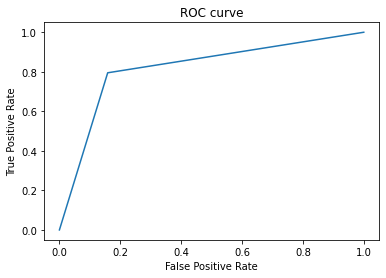

AUC value is 0.8181255526083111 


In [86]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(pred_test,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

AUC SCORE OF LOGISTIC REGRESSION IS 81.8%

# Random Forest Classfier

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
rf=RandomForestClassifier()

In [92]:
#RandomForestClassifier:
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state", i , "The model performs very well")
    print("At random state ", i)
    print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy  is : ", accuracy_score(y_test,pred_test)*100)
    print('\n')

At random state 0 The model performs very well
At random state  0
Training accuracy is :  91.46706586826348
Testing accuracy  is :  82.51121076233184


At random state 1 The model performs very well
At random state  1
Training accuracy is :  92.81437125748504
Testing accuracy  is :  78.47533632286996


At random state 2 The model performs very well
At random state  2
Training accuracy is :  91.61676646706587
Testing accuracy  is :  81.16591928251121


At random state 3 The model performs very well
At random state  3
Training accuracy is :  92.51497005988024
Testing accuracy  is :  81.16591928251121


At random state 4 The model performs very well
At random state  4
Training accuracy is :  91.31736526946108
Testing accuracy  is :  86.54708520179372


At random state 5 The model performs very well
At random state  5
Training accuracy is :  90.71856287425149
Testing accuracy  is :  86.54708520179372


At random state 6 The model performs very well
At random state  6
Training accuracy is :

At Random State 63 model performance is quite well.  we will take this random state and do further analysis.

In [96]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=63)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
print('The accuracy score is :', accuracy_score(y_test,pred_test))
print('The f1 score is : ', f1_score(y_test,pred_test))
print('The confusion matrixis : \n', confusion_matrix(y_test,pred_test))
print('The classification report is : ')
print(classification_report(y_test,pred_test))

The accuracy score is : 0.9147982062780269
The f1 score is :  0.8862275449101796
The confusion matrixis : 
 [[130   5]
 [ 14  74]]
The classification report is : 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       135
           1       0.94      0.84      0.89        88

    accuracy                           0.91       223
   macro avg       0.92      0.90      0.91       223
weighted avg       0.92      0.91      0.91       223



## Find the Best Cross Fold for RandomForest:

In [99]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_rf)
for i in range(2,11):
    rf_cv=cross_val_score(rf,x,y,cv=i)
    cv_mean=rf_cv.mean()
    print("at cv :-",i)
    print("cross validation score is ", cv_mean)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 2
cross validation score is  0.8013629263868596
accuracy score is  0.9147982062780269


at cv :- 3
cross validation score is  0.8282828282828283
accuracy score is  0.9147982062780269


at cv :- 4
cross validation score is  0.8361713731668888
accuracy score is  0.9147982062780269


at cv :- 5
cross validation score is  0.8372606867114432
accuracy score is  0.9147982062780269


at cv :- 6
cross validation score is  0.8249138400145113
accuracy score is  0.9147982062780269


at cv :- 7
cross validation score is  0.8373084223847022
accuracy score is  0.9147982062780269


at cv :- 8
cross validation score is  0.8362089768339769
accuracy score is  0.9147982062780269


at cv :- 9
cross validation score is  0.8249158249158249
accuracy score is  0.9147982062780269


at cv :- 10
cross validation score is  0.8350686641697879
accuracy score is  0.9147982062780269




At Cv=7 the diffrence between cross val mean and accuracy score is very less. so cv=7 selected. 

In [100]:
rf_score=cross_val_score(rf,x,y,cv=7).mean()
print("Cross Validation score:- ", rf_score, "&" , " Accuracy score is :- ", accuracy_score)

Cross Validation score:-  0.8328177727784029 &  Accuracy score is :-  0.9147982062780269


# Hyperparameter tunning for RandomForestClassifer:

In [103]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
parameters={'criterion':['gini','entropy'],'n_estimators':list(range(2,21)),
           'min_samples_split':list(range(2,8)),
           'min_samples_leaf':list(range(2,8)),
          'random_state':list(range(1,11)),
          'max_depth':list(range(4,10))}
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'random_state': 10, 'n_estimators': 14, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'gini'}


In [105]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
rf=RandomForestClassifier(random_state=10,n_estimators=14,min_samples_split=6,min_samples_leaf=6,max_depth=9,criterion='gini')
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
print('The accuracy score is :', accuracy_score(y_test,pred_test))
print('The f1 score is : ', f1_score(y_test,pred_test))
print('The confusion matrixis : \n', confusion_matrix(y_test,pred_test))
print('The classification report is : ')
print(classification_report(y_test,pred_test))

The accuracy score is : 0.8385650224215246
The f1 score is :  0.76
The confusion matrixis : 
 [[130   5]
 [ 31  57]]
The classification report is : 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       135
           1       0.92      0.65      0.76        88

    accuracy                           0.84       223
   macro avg       0.86      0.81      0.82       223
weighted avg       0.85      0.84      0.83       223



# ROC and AUC curve

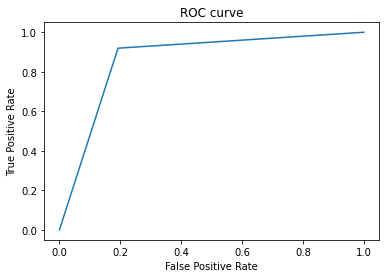

AUC value is 0.8634041274293729 


In [106]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(pred_test,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

# GradientBoostingClassifier:

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbdt_clf=GradientBoostingClassifier()


## finding the random State

In [110]:
#GradientBosstingClassifier:
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=i)
    gbdt_clf.fit(x_train,y_train)
    pred_train=gbdt_clf.predict(x_train)
    pred_test=gbdt_clf.predict(x_test)
    print("At random state ", i)
    print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy  is : ", accuracy_score(y_test,pred_test)*100)
    print('\n')

At random state  0
Training accuracy is :  87.57485029940119
Testing accuracy  is :  83.40807174887892


At random state  1
Training accuracy is :  89.07185628742515
Testing accuracy  is :  78.02690582959642


At random state  2
Training accuracy is :  87.72455089820359
Testing accuracy  is :  80.71748878923766


At random state  3
Training accuracy is :  88.32335329341318
Testing accuracy  is :  78.9237668161435


At random state  4
Training accuracy is :  87.12574850299401
Testing accuracy  is :  85.20179372197309


At random state  5
Training accuracy is :  87.27544910179641
Testing accuracy  is :  83.85650224215246


At random state  6
Training accuracy is :  88.02395209580838
Testing accuracy  is :  86.09865470852019


At random state  7
Training accuracy is :  87.42514970059881
Testing accuracy  is :  80.26905829596413


At random state  8
Training accuracy is :  87.12574850299401
Testing accuracy  is :  86.09865470852019


At random state  9
Training accuracy is :  88.0239520958

Ar Random state 74 model perform very well.

In [111]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=74)
pred_train=gbdt_clf.predict(x_train)
pred_test=gbdt_clf.predict(x_test)
print('The accuracy score is :', accuracy_score(y_test,pred_test))
print('The f1 score is : ', f1_score(y_test,pred_test))
print('The confusion matrixis : \n', confusion_matrix(y_test,pred_test))
print('The classification report is : ')
print(classification_report(y_test,pred_test))

The accuracy score is : 0.9013452914798207
The f1 score is :  0.875
The confusion matrixis : 
 [[124   9]
 [ 13  77]]
The classification report is : 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       133
           1       0.90      0.86      0.88        90

    accuracy                           0.90       223
   macro avg       0.90      0.89      0.90       223
weighted avg       0.90      0.90      0.90       223



# CV for GBDT

In [112]:
pred_gb=gbdt_clf.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_gb)
for i in range(2,21):
    gb_cv=cross_val_score(gbdt_clf,x,y,cv=i)
    cv_mean=gb_cv.mean()
    print("at cv :-",i)
    print("cross validation score is ", cv_mean)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 2
cross validation score is  0.8137123998589207
accuracy score is  0.9013452914798207


at cv :- 3
cross validation score is  0.829405162738496
accuracy score is  0.9013452914798207


at cv :- 4
cross validation score is  0.8372924494000726
accuracy score is  0.9013452914798207


at cv :- 5
cross validation score is  0.8305630531667816
accuracy score is  0.9013452914798207


at cv :- 6
cross validation score is  0.8305595864320696
accuracy score is  0.9013452914798207


at cv :- 7
cross validation score is  0.8395757170978629
accuracy score is  0.9013452914798207


at cv :- 8
cross validation score is  0.8339667792792793
accuracy score is  0.9013452914798207


at cv :- 9
cross validation score is  0.8226711560044895
accuracy score is  0.9013452914798207


at cv :- 10
cross validation score is  0.8272284644194757
accuracy score is  0.9013452914798207


at cv :- 11
cross validation score is  0.8249158249158249
accuracy score is  0.9013452914798207


at cv :- 12
cross validation 

CV=7 selected

In [113]:
gb_score=cross_val_score(gbdt_clf,x,y,cv=7).mean()
print("Cross Validation score:- ", gb_score, "&" , " Accuracy score is :- ", accuracy_score)

Cross Validation score:-  0.8406917885264343 &  Accuracy score is :-  0.9013452914798207


# Hyperparameter Tunning

In [117]:
from sklearn.model_selection import GridSearchCV
param={'max_depth':list(range(4,12,2)),
      'learning_rate':list(np.arange(0.1,1,0.1))}
grid=GridSearchCV(gbdt_clf,param_grid=param)
grid.fit(x_train,y_train)

print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 4}


In [119]:
from sklearn.metrics import accuracy_score , classification_report
gbdt_clf=GradientBoostingClassifier(learning_rate=0.1,max_depth=4)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_test)
print('Accuracy score is : ',accuracy_score(y_test,pred))
gbdt_clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
gbdt_clf_report

Accuracy score is :  0.852017937219731


,0,1,accuracy,macro avg,weighted avg
precision,0.847222,0.860759,0.852018,0.853991,0.852686
recall,0.917293,0.755556,0.852018,0.836424,0.852018
f1-score,0.880866,0.804734,0.852018,0.842800,0.850140
support,133.000000,90.000000,0.852018,223.000000,223.000000


# AUC and ROC curve

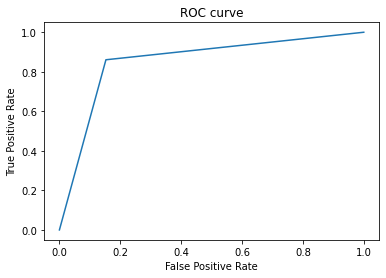

AUC value is 0.8539908579465542 


In [120]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## `We built different models but RandomForestClassifier gives us The Best accuracy 86%`

let's save that model using pickle.

In [121]:
import pickle
filename='titanic_survival.pkl'
pickle.dump(rf,open(filename,'wb'))